In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats
import sklearn 
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
df = pd.read_csv("C:/Users/HP/Desktop/IMARTICUS/presentation/insurance.csv")

In [47]:
df.head()

,id,age,sex,bmi,children,smoker,region,charges
0,1001,19,female,27.900,0,yes,southwest,16884.92400
1,1002,18,male,33.770,1,no,southeast,1725.55230
2,1003,28,male,33.000,3,no,southeast,4449.46200
3,1004,33,male,22.705,0,no,northwest,21984.47061
4,1005,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

In [48]:
df.columns

Index(['id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [49]:
df.shape

(1338, 8)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [51]:
df.describe()

,id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,1669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1001.000000,18.000000,15.960000,0.000000,1121.873900
25%,1335.250000,27.000000,26.296250,0.000000,4740.287150
50%,1669.500000,39.000000,30.400000,1.000000,9382.033000
75%,2003.750000,51.000000,34.693750,2.000000,16639.912515
max,2338.000000,64.000000,53.130000,5.000000,63770.428010


In [52]:
##target variable
df.charges.value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges', ylabel='count'>

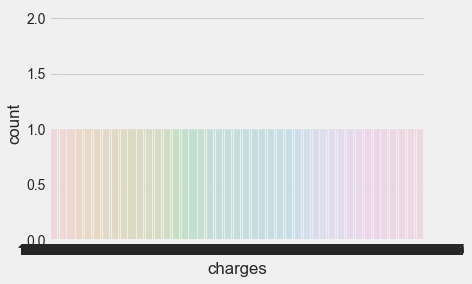

In [53]:
sns.countplot(df['charges'])


In [56]:
# Checking for messing values
df.isna().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [57]:
#Looks like the perfect dataset!!! No null values

# categorical variables

In [58]:
data_categorical=df.loc[:,df.dtypes== object]
data_categorical

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [59]:
## 3 categorical features

# numerical features

In [60]:
data_numerical = df.select_dtypes(exclude=[object])
data_numerical

,id,age,bmi,children,charges
0,1001,19,27.900,0,16884.92400
1,1002,18,33.770,1,1725.55230
2,1003,28,33.000,3,4449.46200
3,1004,33,22.705,0,21984.47061
4,1005,32,28.880,0,3866.85520
...,...,...,...,...,...
1333,2334,50,30.970,3,10600.54830
1334,2335,18,31.920,0,2205.98080
1335,2336,18,36.850,0,1629.83350
1336,2337,21,25.800,0,2007.94500


# check duplicate values

In [61]:
df_dup=df.duplicated().any()
df_dup

False

In [62]:
##no duplicate values

In [63]:
##drop id bcz it doesn't contribute to determine charges

In [64]:
df = pd.DataFrame(df)   ##df = pd.DataFrame(file name)   
data=df.drop(['id'],axis=1)  ##new file name=df.drop(['wt to drop'],axis=1)

In [65]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
cont = data.select_dtypes(exclude=[object])
cont

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


# vishvalisation on categorical features

In [67]:
##count/displot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' Gender Distribution')

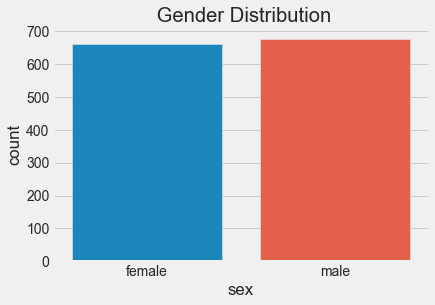

In [68]:
sns.countplot(data['sex'])
plt.title(' Gender Distribution')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' smoker ')

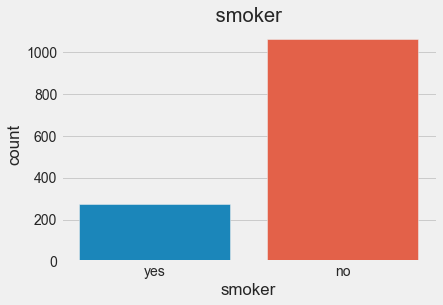

In [69]:
sns.countplot(data['smoker'])
plt.title(' smoker ')


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'region')

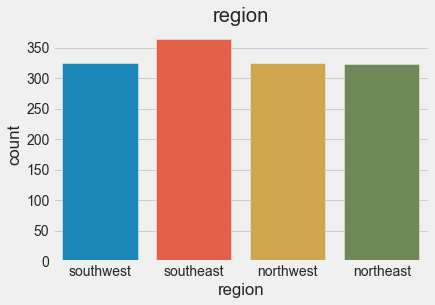

In [70]:
sns.countplot(data['region'])
plt.title('region')

# affection of categorical features on charges

Text(0.5, 1.0, 'Charges vs smokers')

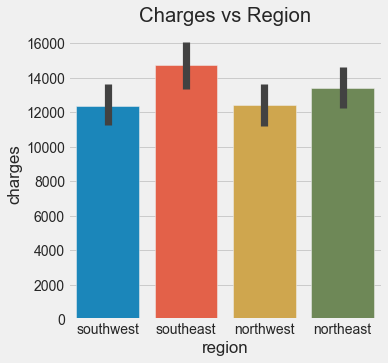

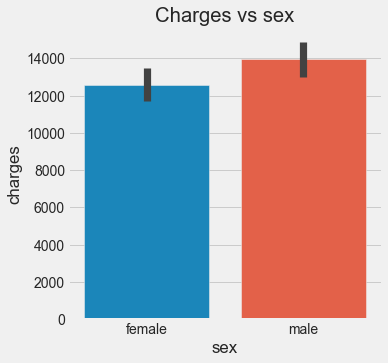

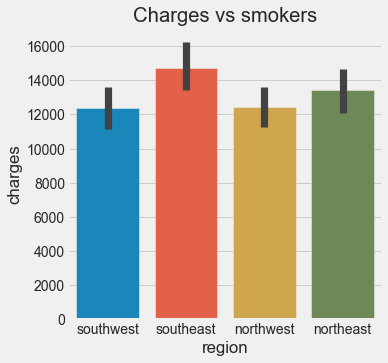

In [71]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=data)
plt.title('Charges vs Region')

plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges', data=df)
plt.title('Charges vs sex')

plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Charges vs smokers')

# vishvalisation on contineous features

array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

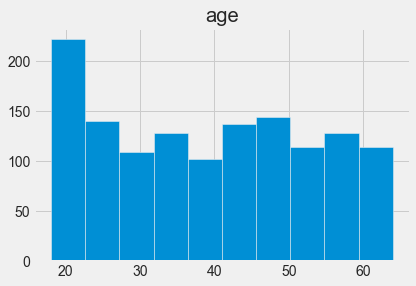

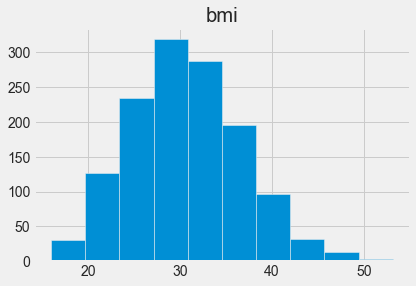

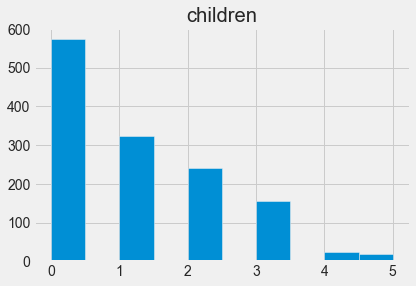

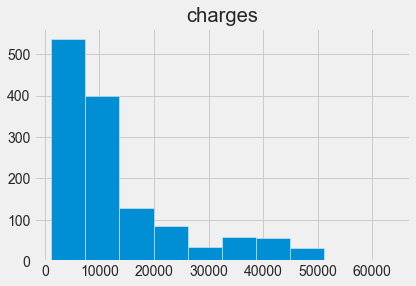

In [72]:
data.hist('age')

data.hist('bmi')

data.hist('children')

data.hist('charges')


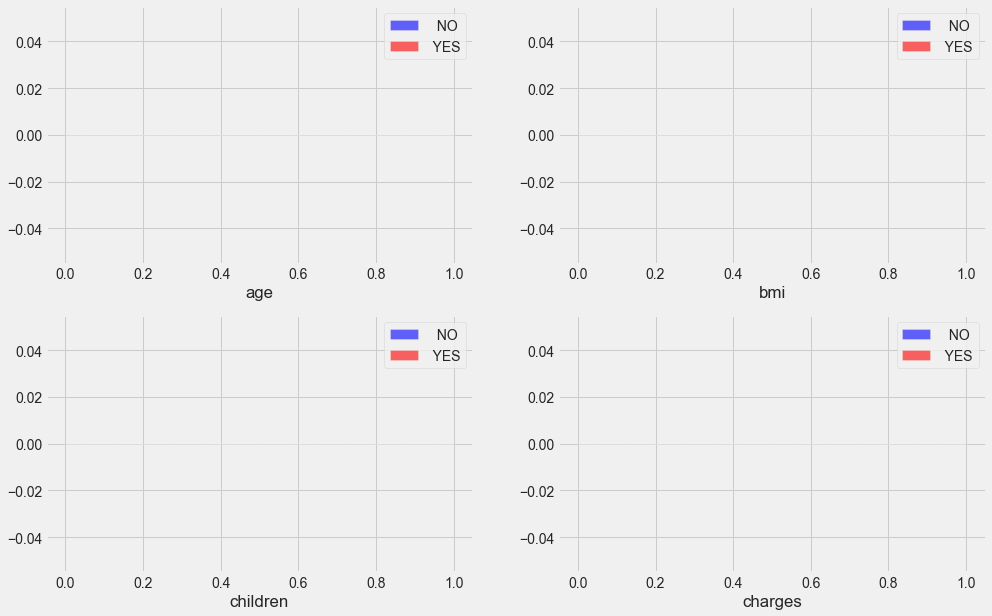

In [73]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(cont, 1):
    plt.subplot(3, 2, i)
    data[data["charges"] == 0][column].hist(bins=35, color='blue', label='  NO', alpha=0.6)
    data[data["charges"] == 1][column].hist(bins=35, color='red', label=' YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# box plot on contineous features

<AxesSubplot:xlabel='region', ylabel='charges'>

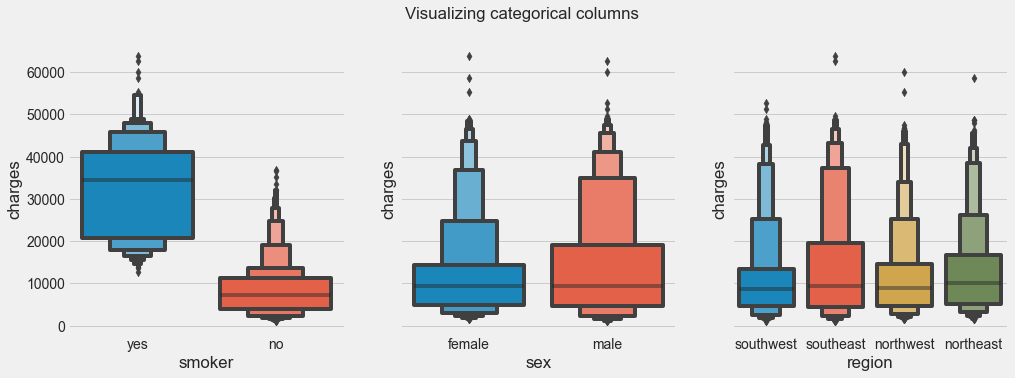

In [74]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=data, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=data, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=data, ax=axes[2])

# Converting categorical into numerical

In [75]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
data['sex'] = data['sex'].apply({'male':0, 'female':1}.get)
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [77]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [78]:
##all are converted into numerical

<AxesSubplot:>

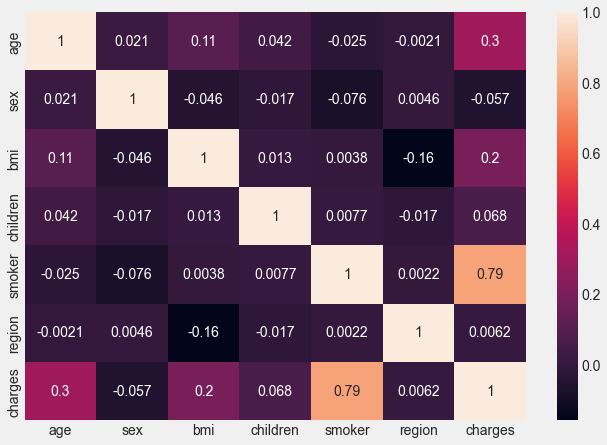

In [79]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot = True)

In [80]:
##lighter the clr more co-relaton
##smoker's having high co-relation where as sex is having low co-relaton

In [81]:
##drop sex
df = pd.DataFrame(data)   ##df = pd.DataFrame(file name)   
data=df.drop(['sex'],axis=1)


In [82]:
data.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,1,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,3,21984.47061
4,32,28.880,0,0,3,3866.85520


# Training and Testing Data


spliting into test & train

In [83]:
X = data.drop(['charges'], axis=1)
y = data.charges

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [85]:
linreg = LinearRegression()

# Print out the coefficients of the model

In [97]:
print(linreg.coef_)

[  257.06145793   335.75108952   424.96403144 23646.18756217
   271.12991466]


In [98]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [88]:
from sklearn.metrics import r2_score

In [89]:
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7833112270019789


# OLS RESULTS

In [99]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:08:54   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.328e+04   1067.979    -12.435      0.0

# Create a scatterplot of the real test values versus the predicted values.

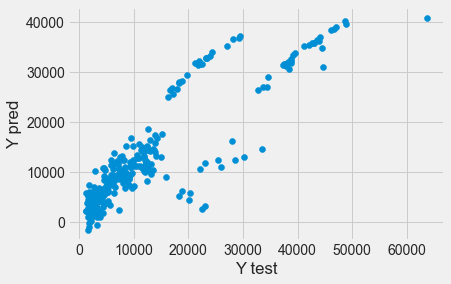

In [90]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

# regression plot of the real test values versus the predicted values.

Text(0, 0.5, 'actual price')

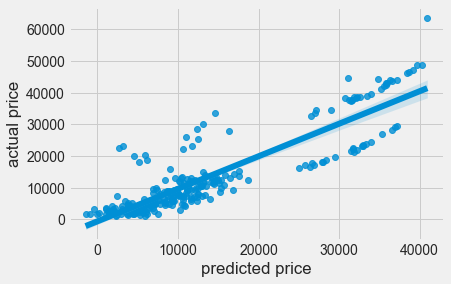

In [100]:
sns.regplot(x=pred,y=y_test)
plt.xlabel("predicted price")
plt.ylabel("actual price")

# Evaluating the Model


Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).



Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas

In [91]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred))))

MAE: 4187.322474715385
MSE: 33640657.13645164
RMSE: 5800.056649417455


# Residuals


You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

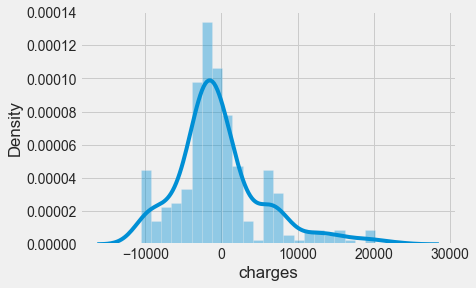

In [92]:
sns.distplot((y_test-pred))

# lets predict a insurance charge of a new customer

In [93]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [94]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [33245.44352109]


In [95]:
##keeping all the values as same except fot smoker lets check the medical insurance of a person who is not a smoker
data = {'age':50, 'bmi':25, 'children':2, 'smoker':0, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [96]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [9599.25595892]


# conclusion 

The medical insurance cost of the new customer is high for smokers